<a href="https://colab.research.google.com/github/PonPradeep/Deep-Learning/blob/main/Gender_Determination_using_Morphometry_of_eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the images


We can use **GoogleDriveDownloader** form **google_drive_downloader** library 
to download the shared files from the shared Google drive link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
                                    dest_path='content/eye_gender_data.zip',
                                    unzip=True)

Unzipping...Done.


## Importing Libraries

In [ ]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import matplotlib.pyplot as plt
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score

## Loading and preparing training data


In [ ]:
labels = pd.read_csv("/content/content/eye_gender_data/Training_set.csv")   # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = []     # initialize an empty numpy array
image_size = 100      # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # converting the image to gray scale
 
  new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
  data.append([new_img_array, train_data['label'][i]])

In [ ]:
data= np.array(data)
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(9220, 2)

In [ ]:
type(data)

numpy.ndarray

In [ ]:
data[1].dtype

dtype('O')

In [ ]:
data[1][0].dtype

dtype('uint8')

In [ ]:
for i in range(data.shape[0]):
  data[i][0]= data[i][0].astype(float)

In [ ]:
data[1][0].dtype

dtype('float64')

In [ ]:
print(data[1][0])
print(data[1][0].dtype)

[[167. 169. 173. ... 194. 195. 195.]
 [168. 170. 173. ... 193. 194. 195.]
 [171. 171. 173. ... 192. 193. 194.]
 ...
 [183. 185. 189. ... 199. 197. 196.]
 [183. 186. 189. ... 199. 197. 195.]
 [184. 186. 190. ... 199. 196. 195.]]
float64


## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

In [ ]:
data[0][0].shape

(100, 100)

In [ ]:
x=[]
y=[]
for k in range(data.shape[0]):
  x.append(data[k][0])
  y.append(data[k][1])
x = np.array(x)
y = np.array(y)

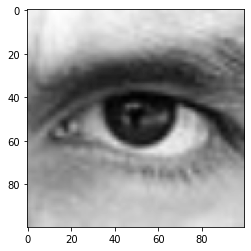

Label: male


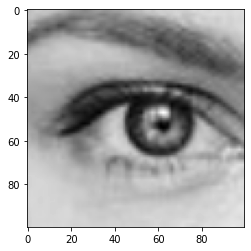

Label: female


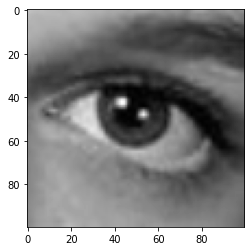

Label: female


In [ ]:
images = x[0:3]
labels = y[0:3]
for i in range(len(images)):
  plt.imshow(images[i],cmap='gray')
  plt.show()
  print ('Label:', labels[i])

In [ ]:
x

array([[[188., 188., 189., ..., 176., 175., 175.],
        [189., 189., 188., ..., 174., 173., 172.],
        [190., 189., 188., ..., 168., 167., 167.],
        ...,
        [133., 137., 144., ..., 168., 167., 166.],
        [134., 138., 145., ..., 165., 164., 163.],
        [135., 139., 146., ..., 163., 162., 162.]],

       [[167., 169., 173., ..., 194., 195., 195.],
        [168., 170., 173., ..., 193., 194., 195.],
        [171., 171., 173., ..., 192., 193., 194.],
        ...,
        [183., 185., 189., ..., 199., 197., 196.],
        [183., 186., 189., ..., 199., 197., 195.],
        [184., 186., 190., ..., 199., 196., 195.]],

       [[181., 179., 177., ..., 131., 134., 136.],
        [178., 177., 174., ..., 127., 127., 128.],
        [174., 172., 170., ..., 120., 118., 116.],
        ...,
        [126., 128., 132., ...,  99.,  96.,  94.],
        [127., 130., 133., ...,  98.,  95.,  93.],
        [128., 131., 135., ...,  98.,  94.,  92.]],

       ...,

       [[189., 190., 192

In [ ]:
y

array(['male', 'female', 'female', ..., 'male', 'male', 'female'],
      dtype='<U6')

In [ ]:
for i in range(len(y)):
  if y[i]=='male':
    y[i]=0
  else: y[i]=1
y

array(['0', '1', '1', ..., '0', '0', '1'], dtype='<U6')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 2)
print(y_train)

['1' '1' '1' ... '1' '0' '1']


In [ ]:
y_train= y_train.astype('float')
y_test= y_test.astype('float')
y_train.dtype , y_test.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape,x_test.shape

((7376, 100, 100), (1844, 100, 100))

In [ ]:
# reshape for feeding into the model
train_images_gr = x_train.reshape(x_train.shape[0], 100, 100, 1)
test_images_gr = x_test.reshape(x_test.shape[0], 100, 100, 1)

print('\nTrain_images.shape: {}, of {}'.format(train_images_gr.shape, train_images_gr.dtype))
print('Test_images.shape: {}, of {}'.format(test_images_gr.shape, test_images_gr.dtype))


Train_images.shape: (7376, 100, 100, 1), of float64
Test_images.shape: (1844, 100, 100, 1), of float64


In [ ]:
print(y_train.shape, y_test.shape)

(7376,) (1844,)


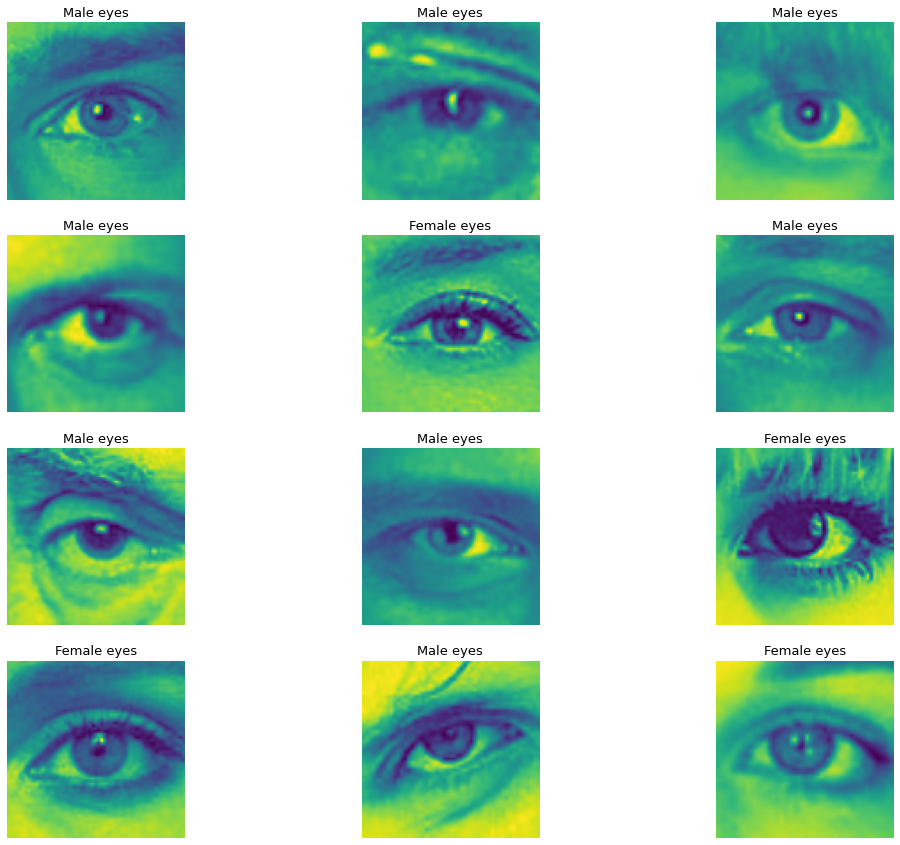

In [ ]:
plt.figure(figsize=(18,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    rnd_idx=np.random.randint(1000)
    if y_train[rnd_idx]==1:
        plt.title('Female eyes',fontdict={'size':13})
    else:
        plt.title('Male eyes',fontdict={'size':13})
    
    plt.axis('off')
    plt.imshow(x_train[rnd_idx])

## Building Model & Hyperparameter tuning
Now we are finally ready, and we can train the model.


In [ ]:
# define input shape
INPUT_SHAPE = (100, 100, 1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), 
                                activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding='same', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), 
                                activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

# define conv-pool layers - set 3
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation=tf.keras.layers.LeakyReLU(alpha=0.1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(tf.keras.layers.Dropout(rate=0.3))
#model.add(tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
#model.add(tf.keras.layers.Dropout(rate=0.20))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 25, 25, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 32)       

## Validate the model


In [ ]:
EPOCHS = 20
train_images_scaled = train_images_gr / 255.0
test_images_scaled = test_images_gr /255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(train_images_scaled, y_train,
                    batch_size=50,
                    callbacks=[es_callback],
                    validation_data= (test_images_scaled, y_test), 
                    epochs=EPOCHS,
                    validation_steps=1, 
                    verbose=1) 

Epoch 1/20
148/148 [==============================] - 5s 31ms/step - loss: 0.5889 - accuracy: 0.7846 - val_loss: 2.8546 - val_accuracy: 0.4600
Epoch 2/20
148/148 [==============================] - 4s 29ms/step - loss: 0.3300 - accuracy: 0.8618 - val_loss: 2.1714 - val_accuracy: 0.5000
Epoch 3/20
148/148 [==============================] - 4s 29ms/step - loss: 0.2507 - accuracy: 0.8982 - val_loss: 1.8256 - val_accuracy: 0.5200
Epoch 4/20
148/148 [==============================] - 4s 30ms/step - loss: 0.2197 - accuracy: 0.9127 - val_loss: 0.3768 - val_accuracy: 0.8200
Epoch 5/20
148/148 [==============================] - 4s 29ms/step - loss: 0.1851 - accuracy: 0.9253 - val_loss: 0.8245 - val_accuracy: 0.8000
Epoch 6/20
148/148 [==============================] - 4s 29ms/step - loss: 0.1461 - accuracy: 0.9435 - val_loss: 0.3810 - val_accuracy: 0.8600
Epoch 7/20
148/148 [==============================] - 4s 30ms/step - loss: 0.1310 - accuracy: 0.9477 - val_loss: 0.2577 - val_accuracy: 0.8800

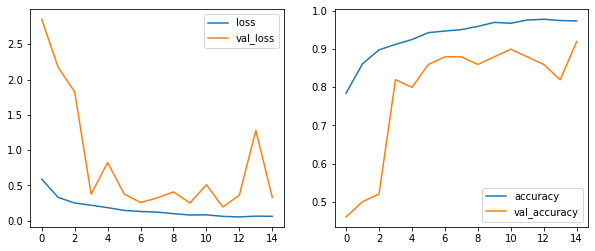

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1])
plt.show()

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0.0: 4029, 1.0: 3347})
Counter({0.0: 1029, 1.0: 815})


In [ ]:
from sklearn.metrics import classification_report
print('CLASSIFICATION REPORT ON TRAIN DATASET \n\n')
pred= np.argmax(model.predict(train_images_scaled), axis=-1)
print(classification_report(y_train, pred, target_names=['male','female']))

print('CLASSIFICATION REPORT ON TEST DATASET \n\n')
pred= np.argmax(model.predict(test_images_scaled), axis= -1)
print(classification_report(y_test, pred, target_names=['male','female']))

CLASSIFICATION REPORT ON TRAIN DATASET 


              precision    recall  f1-score   support

        male       0.99      0.99      0.99      4036
      female       0.99      0.99      0.99      3340

    accuracy                           0.99      7376
   macro avg       0.99      0.99      0.99      7376
weighted avg       0.99      0.99      0.99      7376

CLASSIFICATION REPORT ON TEST DATASET 


              precision    recall  f1-score   support

        male       0.93      0.93      0.93      1022
      female       0.92      0.92      0.92       822

    accuracy                           0.93      1844
   macro avg       0.93      0.93      0.93      1844
weighted avg       0.93      0.93      0.93      1844



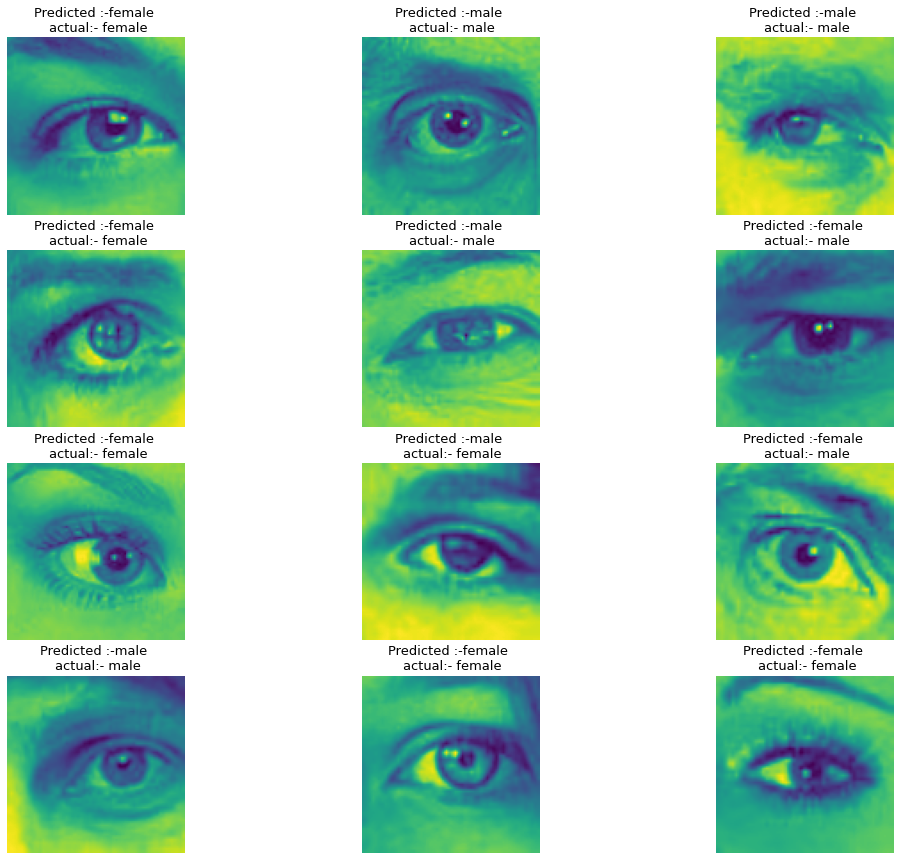

In [ ]:
plt.figure(figsize=(18,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    rnd_idx=np.random.randint(1000)
    
    pred= np.argmax(model.predict(test_images_gr[rnd_idx:rnd_idx+1]), axis=-1)
    if y_test[rnd_idx]==1:
        if pred==1:
            plt.title('Predicted :-female \n actual:- female',fontdict={'size':13})
        else:
            plt.title('Predicted :-male \n actual:- female',fontdict={'size':13})
    else:
        if pred==1:
            plt.title('Predicted :-female \n actual:- male',fontdict={'size':13})
        else:
            plt.title('Predicted :-male \n actual:- male',fontdict={'size':13})
    
    plt.axis('off')
    plt.imshow(x_test[rnd_idx])

## Predict The Output For Testing Dataset 
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. Test.csv).

#### Load Test Set
Load the test data on which final prediction is to be made.

In [ ]:
labels = pd.read_csv("/content/content/eye_gender_data/Testing_set.csv")   # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/test/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_data = pd.merge(images, labels, how = 'inner', on = 'filename')

test = []     # initialize an empty numpy array
image_size = 100      # image size taken is 100 here. one can take other size too
for i in range(len(test_data)):
  
  img_array = cv2.imread(test_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # converting the image to gray scale
 
  new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
  test.append([new_img_array])

In [ ]:
test_data

,filename,filepaths
0,Image_1.jpg,/content/content/eye_gender_data/test/Image_1.jpg
1,Image_2.jpg,/content/content/eye_gender_data/test/Image_2.jpg
2,Image_3.jpg,/content/content/eye_gender_data/test/Image_3.jpg
3,Image_4.jpg,/content/content/eye_gender_data/test/Image_4.jpg
4,Image_5.jpg,/content/content/eye_gender_data/test/Image_5.jpg
...,...,...
2300,Image_2301.jpg,/content/content/eye_gender_data/test/Image_23...
2301,Image_2302.jpg,/content/content/eye_gender_data/test/Image_23...
2302,Image_2303.jpg,/content/content/eye_gender_data/test/Image_23...
2303,Image_2304.jpg,/content/content/eye_gender_data/test/Image_23...


## Data Pre-processing on test_data


In [ ]:
test[0]

[array([[140, 141, 142, ..., 169, 171, 173],
        [138, 138, 138, ..., 166, 168, 170],
        [137, 135, 134, ..., 163, 164, 166],
        ...,
        [146, 150, 155, ..., 151, 151, 151],
        [146, 151, 157, ..., 148, 147, 146],
        [147, 152, 158, ..., 147, 145, 143]], dtype=uint8)]

In [ ]:
test = np.array(test)  
test.shape, test.dtype  

((2305, 1, 100, 100), dtype('uint8'))

In [ ]:
test = test.astype(float)
test[0].dtype 

dtype('float64')

In [ ]:
test=test.reshape(2305,100, 100,1)
test.shape

(2305, 100, 100, 1)

### Make Prediction on Test Dataset

In [ ]:
test = test/255.

prediction = model.predict(test)
prediction

array([[9.9998379e-01, 1.6202393e-05],
       [9.5281130e-01, 4.7188658e-02],
       [9.9579948e-01, 4.2004907e-03],
       ...,
       [9.9995029e-01, 4.9677477e-05],
       [9.9999833e-01, 1.6897782e-06],
       [9.7423053e-01, 2.5769463e-02]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction,axis=1)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
prediction = prediction.astype(str)

In [ ]:
for j in range(len(prediction)):
  if prediction[j]=='0':
    prediction[j]='male'
  else: prediction[j]='female'
prediction

array(['male', 'male', 'male', ..., 'male', 'male', 'male'], dtype='<U21')

## **Saving prediction results locally**

In [ ]:
res = pd.DataFrame({'filename': test_data['filename'], 'label': prediction})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False) 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>